# Assignment 6- KNN Regressor

In [113]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.neighbors import KNeighborsRegressor
from math import sqrt
from sklearn.model_selection import GridSearchCV

In [114]:
# Reading the data

data = pd.read_csv('C:/Users/Dell/Downloads/Admission_Predict.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [116]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [117]:
# removing the spaces between the column names

data.columns = ['Serial_No.', 'GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance_of_Admit']

In [118]:
data.head()

,Serial_No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [119]:
data.describe()

,Serial_No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


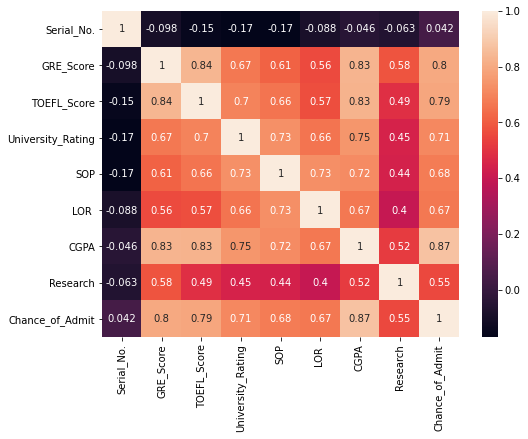

In [120]:
# Checking the correlation
plt.figure(figsize = (8,6))
sns.heatmap(data.corr(), annot = True)
plt.show()

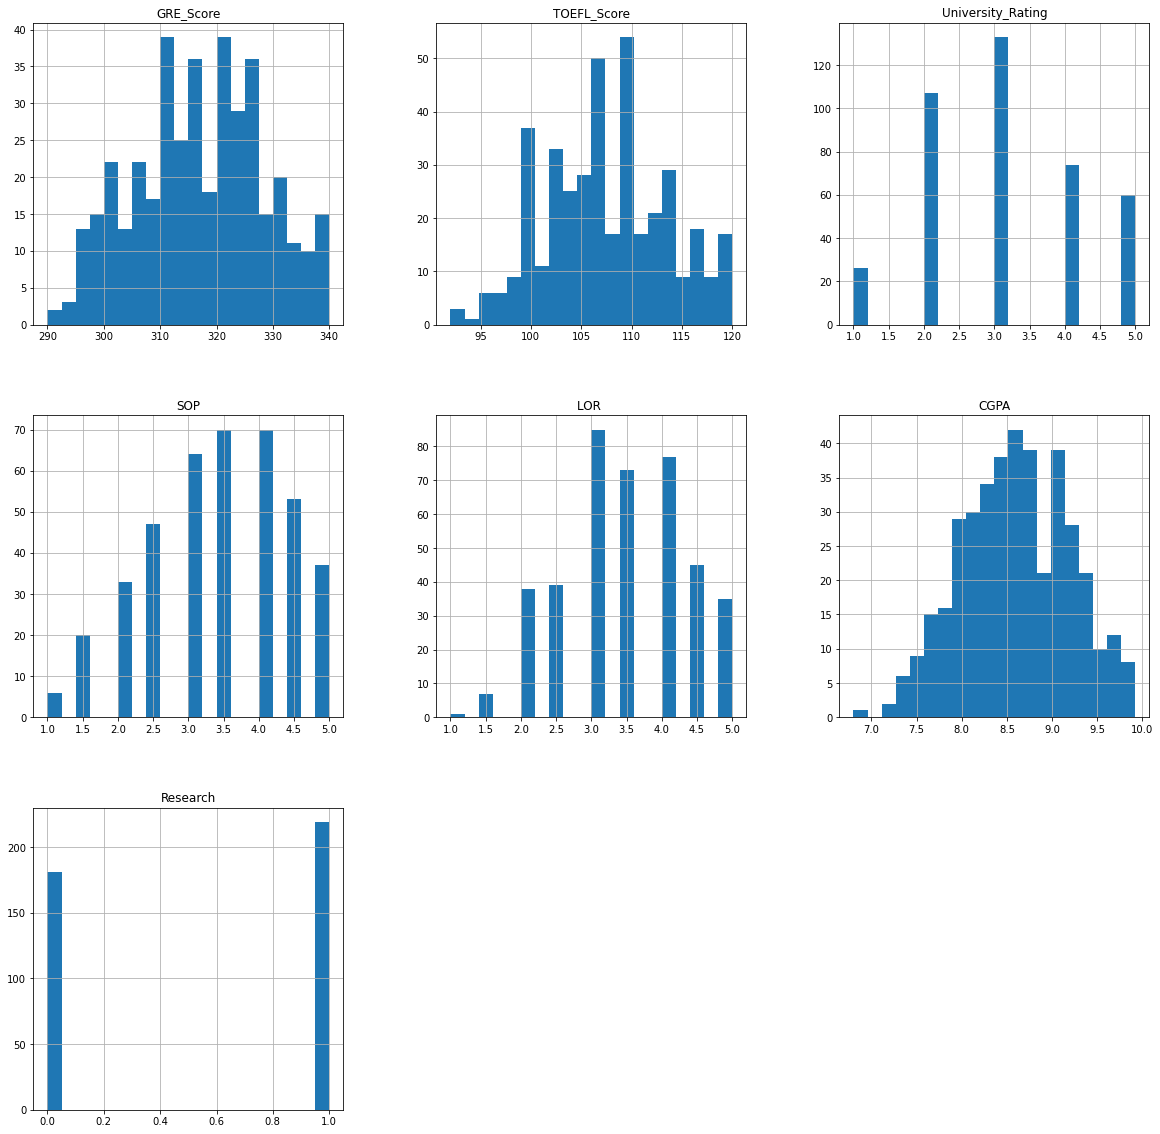

In [121]:
# BAsic EDA
x.hist(bins =20, figsize = (20,20))
plt.show()

In [122]:
# Dropping teh variables that are not required

data.drop(['Serial_No.'], axis = 1, inplace = True)
data.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [123]:
# Splitting the independent and dependent variables

x = data.drop('Chance_of_Admit', axis = 1)
y = data['Chance_of_Admit']

x.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [124]:
# Scaling the data

scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)

In [125]:
# Splitting the data into train and test set

x_tr, x_test, y_tr, y_test = train_test_split(scaled_x, y)
x_tr.shape, x_test.shape, y_tr.shape, y_test.shape

((300, 7), (100, 7), (300,), (100,))

In [126]:
# Applying Linear regression

lr_model = LinearRegression().fit(x_tr, y_tr)

In [127]:
pred_1 = lr_model.predict(x_test)
pred_1

array([0.6968525 , 0.72138053, 0.67808793, 0.72076942, 0.43434196,
       0.78723199, 0.55464242, 0.58232949, 0.7359625 , 0.52446791,
       0.83248472, 0.82485081, 0.64530056, 0.54975817, 0.6873598 ,
       0.77763307, 0.65664796, 0.64810508, 0.72134381, 0.8199795 ,
       0.65319916, 0.62132116, 0.55873329, 0.71902262, 0.68641286,
       0.5213794 , 0.80905975, 0.61993419, 0.62139868, 0.68498454,
       0.79034149, 0.83130515, 0.69456783, 0.55082333, 0.60659948,
       0.78331675, 0.83358972, 0.47910155, 0.70921215, 0.61585106,
       0.53687286, 0.91750094, 0.74946095, 0.61222504, 0.92382232,
       0.78814342, 0.95944194, 0.65557793, 0.9265121 , 0.62317622,
       0.60512683, 0.69959264, 0.65263315, 0.56613272, 0.90798337,
       0.86917178, 0.57382059, 0.8186298 , 0.65094523, 0.65785106,
       0.80869293, 0.53835221, 0.72355192, 0.58712466, 0.9047346 ,
       0.94252273, 0.75283566, 0.71103596, 0.5728815 , 0.47242392,
       0.94847841, 0.55679223, 0.52287745, 0.70167025, 0.62958

In [128]:
# Checking the r2_score
r2_score(y_test, pred_1)

0.7859796605532534

In [129]:
# Root mean squared error
sqrt(mse(y_test, pred_1))

0.06612115768963923

In [130]:
# KNN - Regression

In [132]:
# Find the optimal number of k

params = {'n_neighbors': range(1,20)}

gscv_model = GridSearchCV(KNeighborsRegressor(), params, cv = 15)

In [133]:
# Fitting the model

gscv_model.fit(x_tr, y_tr)

GridSearchCV(cv=15, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 20)})

In [134]:
# Best value for k

gscv_model.best_params_

{'n_neighbors': 19}

In [136]:
# Applying knn regression

knn_reg = KNeighborsRegressor(n_neighbors = 19).fit(x_tr, y_tr)

pred_knn = knn_reg.predict(x_test)

In [137]:
# r2 score

r2_score(y_test, pred_knn)

0.7254512436626281

In [138]:
# Checking rmse

mse(y_test, pred_knn, squared = False)

0.07488979900133148

INFERENCE: 

From the r2_score and rmse values of the two models we can see that linear regression model performs better than the knn regressor.